## Your Name: Sandra Mishale Nino Arbelaez
## Project 1 attempted was: (1) Tabular
## Project 2 attempted was: (2) Image

# CSC8635 Coursework Specification

For this coursework you will attempt **TWO** of the four longer project-style questions. All of the project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

---
---
---
#Mini-projects: Introduction

This document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **TWO** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick **TWO** out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

In [1]:
# Uncomment this line to install these packages
#!pip install --upgrade ydata-profiling skrebate imblearn

  Obtaining dependency information for tpot from https://files.pythonhosted.org/packages/7b/a7/0060d028906ecd058b1331c3ce6f3f19ba03464b21dc9abbbaf66b0a1091/TPOT-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/c6/12/a869b9f81c992a179a27d76154b3ae3c1a65a43c9ec117437762093a75ca/ydata_profiling-4.6.3-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for xgboost>=1.1.0 from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/dd/b7/9aea7ee6c01fe3f3c03b8ca3c7797c866df5fecece9d6cb27caa138

  Obtaining dependency information for annotated-types>=0.4.0 from https://files.pythonhosted.org/packages/28/78/d31230046e58c207284c6b2c4e8d96e6d3cb4e52354721b944d3e1ee4aa5/annotated_types-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-core==2.14.6 from https://files.pythonhosted.org/packages/fb/17/3e4908cf8cb5a1d189f9dfa7cb5698d945e9a4db6b9138e3fef3c32c1f68/pydantic_core-2.14.6-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.1 MB/s eta 0:00:0000:0100:01
  Created wheel for skrebate: fil

### Libraries
These are the libraries that are being used in this first project. 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline
from sklearn import impute
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Exploratory Data Analysis

Firstly, we will start by doing the Exploratory Data Analysis of the FARS dataset. To do this, we will generate a Pandas Profiling Report, which gives us detailed information about the predictors and the response variable of our data, including any existing issues. Additionally, we can see the shape of our data, the variable types, duplicated rows, correlation in our variables, missing values, the distribution for numeric predictors, the categories for the categorical explanatory variables, etc.

In [5]:
data = pd.read_csv("./fars.csv")

profile = ProfileReport(data, title='Pandas Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From this extensive report, we can highlight these findings:

1. **Explanatory variables**: 

- **Numeric Variables**: 
    - *Age* and *Alcohol test result* need to be transformed because they do not have the same scale.
    - *Drug Test Results (1_of_3)*, *Drug Test Results (2_of_3)* and *Drug Test Results (3_of_3)* are related to the columns *Drug Test Type (1_of_3)*, *Drug Test Type (2_of_3)* and *Drug Test Type (3_of_3)*. We can see there are some whiskers. A value of zero does not necessarily mean a negative result, but an absence of the test. We will drop these columns. 
- **Categorical Variables**:
    - The majority of the categoric variables have an 'Unknown' value in one of the categories. This will be considered as a missing value. In all the variables, this value accounts for less than 10-20%, therefore, we can safely make an imputation of the most frequent value. 
    - *Person Type* and *Air bag availability/deployment* have special 'Unknown' values which will also be treated as missing values and the same approach explained above will be followed.
    - *Method alcohol determination*, *Police reported drug involvement*, *Method of drug determination* have the category 'Not_Reported' which will be considered a missing value. It accounts for 83.4%, 74%, and 93.9%, respectively. Therefore, we will drop these columns because they do not seem they contribute to the models.
    - *Drug Test Type (1_of_3)*, *Drug Test Type (2_of_3)* and *Drug Test Type (3_of_3)* have the category 'Not_Tested_for_Drugs'. It accounts for 63%, 88.4%, and 89.5%, respectively. It is not worth it to impute values, thus, we will drop these columns as well.
    - *Related factor (1)- Person level*, *Related factor (2)- Person level* and *Related factor (3)- Person level* have the category 'Not_Applicable_-_Driver/None_-_All_Other_Persons'.This accounts for 95.6%, 95.6%, and 99.4% respectively, which does not provide valuable information for the task. Thus, we will drop these columns. 

2. **Response variable (Injury Severity)**:

- It has the values of 'Unknown' (0.9%) and 'Injured_Severity_Unknown' (0.3%). We will remove these records because there is no point in predicting these labels. 
- There is a class imbalance in the response variable. 
- It is a multi-class classification problem because we have more than two labels in the response variable. 

3. **Duplicate rows**:

We have 4804 duplicates which accounts for 4.8% of the dataset. We can safely remove them. 

## Data pre-processing

After exploring and understanding our dataset, we will do some transformations to our data before creating the  pipelines of our classifiers. 

The Pandas Profiling Report warned us about duplicates in the data. Therefore, we will proceed and remove them.

In [44]:
data = data.drop_duplicates()

### Variable: AGE

We will analyse in more detail the *AGE* variable because there are some inconsistencies in its values, which captured my attention in the report.  

In the following boxplot, we can see that the minimum age is ZERO and there are many outliers. This is accounted for 99 years old.

<Axes: >

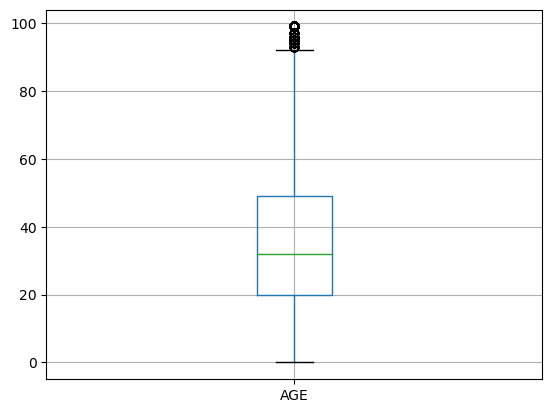

In [392]:
data.boxplot(column='AGE')

In [46]:
data['AGE'].describe()

count    93004.000000
mean        36.629435
std         21.311864
min          0.000000
25%         20.000000
50%         32.000000
75%         49.000000
max         99.000000
Name: AGE, dtype: float64

There should not be ages of Zero in the dataset and the outliers with ages of 99 can be potentially removed. To make this decision, we will see the proportion of these values in the dataset. 

In [47]:
index_0 = data.index[data.AGE == 0].tolist()
print("There are {} records with an age of Zero. This accounts for {:.3f}%".format(len(index_0), len(index_0)/len(data)*100))
index_1 = data.index[data.AGE >= 99].tolist()
print("There are {} records with an age greater or equal to 99. This accounts for {:.3f}%".format(len(index_1), len(index_1)/len(data)*100))

There are 415 records with an age of Zero. This accounts for 0.446%
There are 1201 records with an age greater or equal to 99. This accounts for 1.291%


Since the percentages of these records are very small, we will remove them.

In [48]:
data_reduced = data.drop(index_0)
data_reduced = data_reduced.drop(index_1)

Our initial dataset had 100968 records. After doing these transformations, our new data has the following records:

In [49]:
len(data_reduced)

91388

We already transformed the records in our data. As mentioned in the EDA step, the most frequent value of some columns does not give much information (i.e. 'Not Reported') and accounts percentages more than half of the values. Therefore, we will drop the following columns:

- METHOD_ALCOHOL_DETERMINATION
- POLICE-REPORTED_DRUG_INVOLVEMENT
- METHOD_OF_DRUG_DETERMINATION
- DRUG_TEST_TYPE_(1_of_3)
- DRUG_TEST_RESULTS_(1_of_3)
- DRUG_TEST_TYPE_(2_of_3)
- DRUG_TEST_RESULTS_(2_of_3)
- DRUG_TEST_TYPE_(3_of_3)
- DRUG_TEST_RESULTS_(3_of_3)
- RELATED_FACTOR_(1)-PERSON_LEVEL
- RELATED_FACTOR_(2)-PERSON_LEVEL
- RELATED_FACTOR_(3)-PERSON_LEVEL

In [50]:
data_reduced = data_reduced.drop(['METHOD_ALCOHOL_DETERMINATION', 'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
                                  'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
                                  'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)', 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
                                  'RELATED_FACTOR_(3)-PERSON_LEVEL'], axis=1)

Moreover, we will remove the Unknowns of the response variable because there makes no sense to predict these classes. 

In [51]:
mask = (data_reduced['INJURY_SEVERITY'] == 'Unknown') | (data_reduced['INJURY_SEVERITY'] == 'Injured_Severity_Unknown')
index = data_reduced[mask].index.tolist()
data_reduced = data_reduced.drop(index)

After doing all these transformations, the new shape of our dataframe is:

In [33]:
data_reduced.shape

(91033, 18)

# Pipeline

We will create some pipelines which include additional preprocessing steps for the predictors, feature selection, class imbalance management and, lastly, the classifier. Some of these pipelines will be very complex and we will notice how this affects the computational time. 

First of all, we will separate our predictor variables (labelled as X) and the response variable (labelled as y) to do further transformations. 

In [52]:
X = data_reduced.iloc[:, 0:17]
y = data_reduced['INJURY_SEVERITY']

There are different approaches for splitting our dataset into training, validation and test sets to tune the hyperparameters of the models and make the model evaluation by computing the performance metrics. One approach is nested K-fold cross-validation. However, the computational time would be extremely high considering the shape of our current dataset and the complexity of the pipelines. Consequently, we will split our data into training and test sets by doing an 80%-20% partition. In this way, we can reduce the computational time of our experiments. Moreover, this split avoids data leakage from the training set to the test set. Therefore, the model can generalise better to unseen data by having the preprocessing steps learned only in the training data. 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We will do the preprocessing steps for the predictor variables:

- The two continuous variables (Age and Alcohol test result) will be transformed to the same scale by doing a standardisation.
- For all the categorical variables, except Person Type and Airbag availability, we will impute the unknown values by the most frequent value. Then, we will perform OneHotEncoding.
- For the Person Type and Airbag availability variables, we will impute some especial unknown values by the most frequent value. Then, we will perform OneHotEncoding. 

At the end of the next code block, we make use of ColumnTransformer to chain all the previous transformations to use in the final Pipeline. 

In [54]:
numeric_features = ['AGE', 'ALCOHOL_TEST_RESULT']
numeric_transformer = Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler())
])

categorical_features = ['SEX', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'ALCOHOL_TEST_TYPE',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL', 'RACE']
categorical_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(missing_values='Unknown', strategy='most_frequent')),
    ('onehot', preprocessing.OneHotEncoder())
])

# Special Unknown values for Person Type
person_type_feature = ['PERSON_TYPE']
person_type_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(missing_values='Unknown_Type_of_Non-Motorist', strategy='most_frequent')),
    ('imputer2', impute.SimpleImputer(missing_values='Unknown_Occupant_Type_in_a_Motor_Vehicle_in_Transport', strategy='most_frequent')),
    ('onehot', preprocessing.OneHotEncoder())
])

# Special Unknown values for airbag availability
airbag_avl_feature = ['AIR_BAG_AVAILABILITY/DEPLOYMENT']
airbag_avl_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(missing_values='Unknown_(If_Airbag_Available)', strategy='most_frequent')),
    ('imputer2', impute.SimpleImputer(missing_values='Air_Bad_Available-Deployment_Not_Known_for_this_Seat', strategy='most_frequent')),
    ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('cat2', person_type_transformer, person_type_feature),
        ('cat3', airbag_avl_transformer, airbag_avl_feature)
        ])

# Model 1: Logistic Regression

The first model is Logistic Regression and we will use the parameter *class_weight* to do the class imbalance correction by itself. 
Also, we will use the Recursive Feature Elimination to perform the feature selection of our variables.

In [58]:
classifier = LogisticRegression(C = 100, class_weight="balanced", multi_class='ovr', solver='liblinear')
selector = RFE(classifier, n_features_to_select = 4, step=1)

Because the values of our response variable are strings, we have to transform them into numeric values to input them correctly in our models. Since we split our dataset already, we will use two different methods to avoid data leakage from one partition to the other.

In [57]:
label_encoder = LabelEncoder()

y_train_trans = label_encoder.fit_transform(y_train)
y_test_trans = label_encoder.transform(y_test)

The pipeline for this first experiment consists in the preprocessing steps summarised in the ColumnTransformer mentioned earlier, feature selection and the Logistic Regression classifier. 

In [63]:
pipeline = Pipeline([('preprocessor', preprocessor), ('FS', selector), ('classifier',classifier)])

### Hyperparameter tuning 

To perform the hyperparameter tuning for our model, we will define a *param_grid* with the hyperparameters and their potential values. Then, we will use **GridSearchCV**, which takes this *param_grid*, and creates all the possible combinations of our hyperparameters and tests them to select the best model by performing cross-validation. In this way, if we add many hyperparameters and associated values in the grid, the computational time of this step increases significantly.

In [64]:
param_grid = dict(FS__n_features_to_select=[2, 4, 8],
                  classifier__C=[1, 10, 100])

For this first experiment, it took more than 4 hours to run by doing 45 fits. 

In [65]:
print("# Tuning hyper-parameters")
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=kf,scoring="accuracy",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train_trans)

# Tuning hyper-parameters
Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'ALCOHOL_TEST_RESULT']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(missing_values='Unknown',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEnc...
                                       ('FS',
                                        RFE(estimator=LogisticRegression(C=100,
                                                                         class_weight='balanced',
                                                                         multi_class='ovr',
                                                                         solver='liblinear'),
                                            n_features_to_select=4)),
                                       ('classifier',
                                        LogisticRegression(C=100,
                                                           class_weight='balanced',
                                                           multi_class='ovr',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'FS__n_features_to_select': [2, 4, 8],
                         'classifier__C': [1, 10, 100]},
             scoring='accuracy', verbose=1)

After doing the hyperparameter tuning, the best set of parameters is: 

In [71]:
estimator = grid_search.best_estimator_
num_feat = estimator.named_steps['FS'].n_features_to_select
print('Number of selected features: {0}'.format(num_feat))
print('Logistic Regression - Best C: {0}'.format(estimator.named_steps['classifier'].C))

Number of selected features: 8
Logistic Regression - Best C: 1


Now that we know the best parameters for our data and the Logistic Regression classifier, we can make some predictions in the test set that we separated from the training set, to see how well the model performs in unseen data. 

Moreover, we will create a confusion matrix with the original labels of our data. From this confusion matrix, there are many zeros, meaning it did not correctly predict many of the classes from the response variable. Therefore, the accuracy of the model might be affected. 

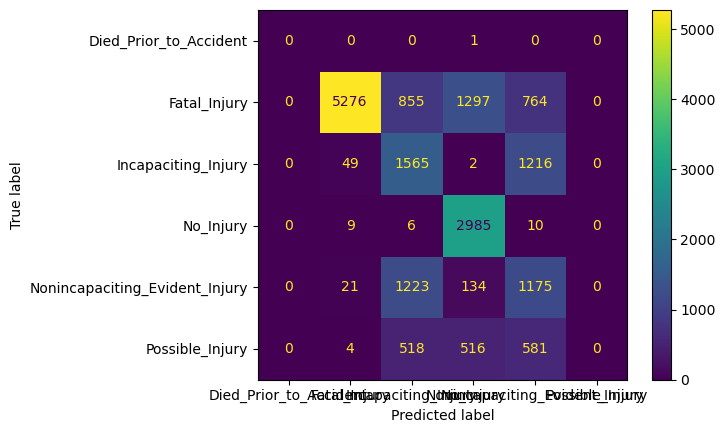

In [74]:
y_hat = estimator.predict(X_test)

y_hat_orig = label_encoder.inverse_transform(y_hat)
y_test_orig = label_encoder.inverse_transform(y_test_trans)

cm=metrics.confusion_matrix(y_test_orig,y_hat_orig)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

We summarise some performance metrics such as precision, recall and f1-score in the following classification report. We can state that the model performs well in predicting 'Fatal_Injury' but struggles with classes like 'Died_Prior_to_Accident' and 'Possible_Injury'.

In [194]:
print(classification_report(y_test_orig, y_hat_orig, labels=label_encoder.classes_))

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         1
                  Fatal_Injury       0.98      0.64      0.78      8192
           Incapaciting_Injury       0.38      0.55      0.45      2832
                     No_Injury       0.60      0.99      0.75      3010
Nonincapaciting_Evident_Injury       0.31      0.46      0.37      2553
               Possible_Injury       0.00      0.00      0.00      1619

                      accuracy                           0.60     18207
                     macro avg       0.38      0.44      0.39     18207
                  weighted avg       0.65      0.60      0.60     18207



/Users/sandra.nino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandra.nino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandra.nino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of the Logistic Regression Classifier is 0.604. This is a quite low accuracy for the model. The reason for this could be the number of selected features was quite low in the initial param_grid. Thus, it might not capture the complex interactions between features.

In [78]:
print('Logistic Regression classifier accuracy: {:.3f}'.format(metrics.accuracy_score(y_test_trans, y_hat)))

Logistic Regression classifier accuracy: 0.604


# Model 2: Random Forest

We will keep the same preprocessing steps mentioned previously and the same feature selection method (RFE), but we will switch to a new classifier: Random Forest. We will use the parameter *class_weight* to do the class imbalance correction by itself. 

In [88]:
classifier = RandomForestClassifier(max_depth=3,n_estimators=500, class_weight="balanced")
selector = RFE(classifier, n_features_to_select = 4, step=1)
pipeline = Pipeline([('preprocessor', preprocessor), ('FS', selector), ('classifier',classifier)])

### Hyperparameter tuning

The hyperparameter tuning process will be computationally more expensive because we will have three hyperparameters, each with three different values, plus the Random Forest classifier is more complex to run. Moreover, we are increasing the number of features to select to check if our assumption of the low accuracy in Logistic Regression is valid.

In [86]:
param_grid = dict(FS__n_features_to_select=[8, 10, 12],
                  classifier__max_depth=[2, 3, 4],
                  classifier__n_estimators=[100, 200, 500])

The GridSearchCV took longer compared to the Logistic Regression run due to the increased complexity of the search space combined with the complexity of the new classifier. In this case, we have 135 fits.

In [89]:
grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=kf,scoring="accuracy",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train_trans)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'ALCOHOL_TEST_RESULT']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(missing_values='Unknown',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEnc...
                                        RFE(estimator=RandomForestClassifier(class_weight='balanced',
                                                                             max_depth=3,
                                                                             n_estimators=500),
                                            n_features_to_select=4)),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=3,
                                                               n_estimators=500))]),
             n_jobs=-1,
             param_grid={'FS__n_features_to_select': [8, 10, 12],
                         'classifier__max_depth': [2, 3, 4],
                         'classifier__n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

After doing the hyperparameter tuning, the best set of parameters is: 

In [91]:
estimator_rf = grid_search.best_estimator_
num_feat_rf = estimator_rf.named_steps['FS'].n_features_to_select
print('Number of selected features: {0}'.format(num_feat_rf))
print('Max depth {0}'.format(estimator_rf.named_steps['classifier'].max_depth))
print('Number of trees {0}'.format(estimator_rf.named_steps['classifier'].n_estimators))

Number of selected features: 12
Max depth 4
Number of trees 200


Now that we know which are the best parameters for our data and the Random Forest classifier, we can make some predictions in the test set to see how well the model performs in unseen data. 

From this confusion matrix, we can see that there are many zeros, meaning it did not correctly predict many of the classes from the response variable. In this case, this model struggles to predict the 'Possible_injury' class. Therefore, the accuracy of the model might be affected. 

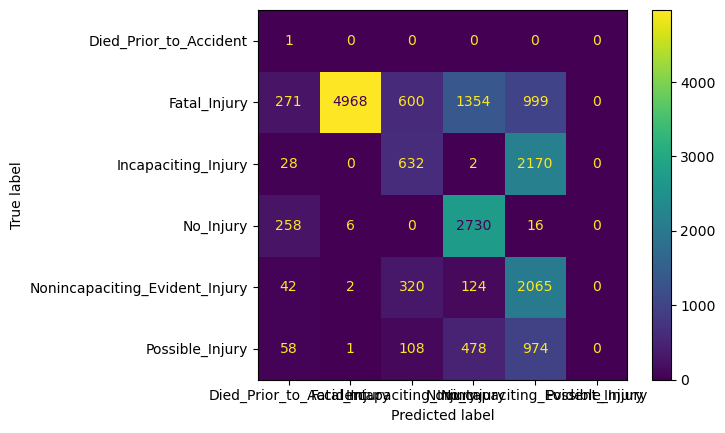

In [92]:
y_hat_rf = estimator_rf.predict(X_test)

y_hat_rf_orig = label_encoder.inverse_transform(y_hat_rf)
y_test_rf_orig = label_encoder.inverse_transform(y_test_trans)

cm_rf=metrics.confusion_matrix(y_test_rf_orig,y_hat_rf_orig)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

The accuracy of the Random Forest Classifier is 0.571 which is lower than the Logistic Regression classifier.

In [94]:
print('Random Forest classifier accuracy: {:.3f}'.format(metrics.accuracy_score(y_test_trans, y_hat_rf)))

Random Forest classifier accuracy: 0.571


# Model 3: Random Forest with SMOTETomek + more features

We will keep the same preprocessing steps, the same feature selection method, the same classifier (Random Forest) but we will try another approach for the class imbalance correction. This is a combination of oversampling the minority class and undersampling the majority class by performing SMOTE followed by Tomek Links, respectively. 

In [96]:
classifier = RandomForestClassifier(max_depth=3,n_estimators=500)
selector = RFE(classifier, n_features_to_select = 4, step=1)
sm_tl = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
pipeline = Pipeline([('preprocessor', preprocessor), ('FS', selector), ('sm_tl', sm_tl), ('classifier',classifier)])

### Hyperparameter tuning

The hyperparameter tuning process will still be computationally more expensive than the Random Forest pipeline because we are adding a very complex step, the SMOTE + Tomek Links to perform the class imbalance correction. Moreover, we are increasing the number of features to select to check if our assumption of the low accuracy in Logistic Regression is valid, and we are increasing the depth of the Random Forest to see if it improves the accuracy.

In [97]:
param_grid = dict(FS__n_features_to_select=[12, 16, 18],
                  classifier__max_depth=[4, 6, 8],
                  classifier__n_estimators=[100, 200, 500])

The GridSearchCV of this process took 12 hours to run as expected due to the complexity of the pipeline and the search space. 

In [98]:
grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=kf,scoring="accuracy",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train_trans)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'ALCOHOL_TEST_RESULT']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(missing_values='Unknown',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEnc...
                                        RFE(estimator=RandomForestClassifier(max_depth=3,
                                                                             n_estimators=500),
                                            n_features_to_select=4)),
                                       ('sm_tl',
                                        SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                       ('classifier',
                                        RandomForestClassifier(max_depth=3,
                                                               n_estimators=500))]),
             n_jobs=-1,
             param_grid={'FS__n_features_to_select': [12, 16, 18],
                         'classifier__max_depth': [4, 6, 8],
                         'classifier__n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

After doing the hyperparameter tuning, the best set of parameters is: 

In [99]:
estimator_rf_smtl = grid_search.best_estimator_
num_feat_rf_stml = estimator_rf_smtl.named_steps['FS'].n_features_to_select
print('Number of selected features: {0}'.format(num_feat_rf_stml))
print('Max depth {0}'.format(estimator_rf_smtl.named_steps['classifier'].max_depth))
print('Number of trees {0}'.format(estimator_rf_smtl.named_steps['classifier'].n_estimators))

Number of selected features: 18
Max depth 8
Number of trees 100


Now that we know which are the best parameters for our data and the Random Forest classifier with the SMOTETomek addition, we can make some predictions in the test set.

From this confusion matrix, we can see that this complex pipeline provided slightly better results in terms of classification performance. However, there are still many zeros in the confusion matrix meaning that still struggles to predict many of the classes from the response variable. 

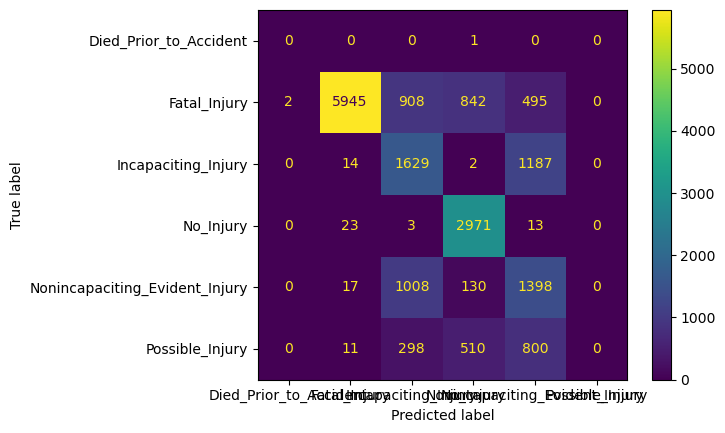

In [100]:
y_hat_rf_stml = estimator_rf_smtl.predict(X_test)

y_hat_rf_stml_orig = label_encoder.inverse_transform(y_hat_rf_stml)
y_test_rf_stml_orig = label_encoder.inverse_transform(y_test_trans)

cm_rf_stml=metrics.confusion_matrix(y_test_rf_stml_orig,y_hat_rf_stml_orig)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf_stml, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

In the following classification report, we can see that the model performs well in predicting 'Fatal_Injury' but struggles with classes like 'Died_Prior_to_Accident' and 'Possible_Injury' like in the Logistic Regression model. However, this is the best model so far with an accuracy of 0.66. 

In [193]:
print(classification_report(y_test_rf_stml_orig, y_hat_rf_stml_orig, labels=label_encoder.classes_))

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         1
                  Fatal_Injury       0.99      0.73      0.84      8192
           Incapaciting_Injury       0.42      0.58      0.49      2832
                     No_Injury       0.67      0.99      0.80      3010
Nonincapaciting_Evident_Injury       0.36      0.55      0.43      2553
               Possible_Injury       0.00      0.00      0.00      1619

                      accuracy                           0.66     18207
                     macro avg       0.41      0.47      0.43     18207
                  weighted avg       0.67      0.66      0.64     18207



/Users/sandra.nino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandra.nino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandra.nino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 4: Decision Tree + PCA 

We will simplify the pipeline and reduce the unnecessary steps. Therefore, in the preprocessing step, we will not make the imputation of "special unknown" values of Person Type and Airbag availability. Also, we will remove the computationally expensive process of feature selection and we will leave the classifier to deal with the class imbalance, thus, we will not introduce any over-sampling and/or under-sampling method for this problem. 

In [197]:
categorical_features = ['SEX', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'ALCOHOL_TEST_TYPE',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL', 'RACE', 'PERSON_TYPE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT']
categorical_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(missing_values='Unknown', strategy='most_frequent')),
    ('onehot', preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

pca = PCA()

In this sense, the new pipeline will have the preprocessing steps with the new changes, PCA to do dimensionality reduction and the new classifier will be Decision Tree. 

In [187]:
classifier = DecisionTreeClassifier(max_depth=4, class_weight='balanced')

pipeline = Pipeline([('preprocessor', preprocessor), ('pca', pca), ('classifier',classifier)])

### Hyperparameter tuning

The hyperparameter tuning process will be less computationally expensive than all other previous pipelines. In this new *param_grid* we just have two hyperparameters, each with three values. Therefore, we have 45 fits.

In [163]:
param_grid = dict(pca__n_components = [6, 8, 10],
                  classifier__max_depth=[4, 6, 8])

We can see from the figure below how the pipeline is less complex. The GridSearchCV took around 2 hours for this case. 

In [188]:
grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=kf,scoring="accuracy",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train_trans)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'ALCOHOL_TEST_RESULT']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(missing_values='Unknown',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEnc...
                                                                          'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
                                                                          'ALCOHOL_TEST_TYPE',
                                                                          'HISPANIC_ORIGIN',
                                                                          'TAKEN_TO_HOSPITAL',
                                                                          'RACE',
                                                                          'PERSON_TYPE',
                                                                          'AIR_BAG_AVAILABILITY/DEPLOYMENT'])])),
                                       ('pca', PCA()),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=4))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [4, 6, 8],
                         'pca__n_components': [6, 8, 10]},
             scoring='accuracy', verbose=1)

After doing the hyperparameter tuning, the best set of parameters is: 

In [189]:
estimator_dt = grid_search.best_estimator_
print('Max depth {0}'.format(estimator_dt.named_steps['classifier'].max_depth))
print('Number of pca components {0}'.format(estimator_dt.named_steps['pca'].n_components))

Max depth 8
Number of pca components 6


Now we can make some predictions in the test set with the best set of parameters. In addition, we can see that the accuracy of this experiment is slightly better than Random Forest and Logistic Regression, but still, it did not improve compared to the complex model of Random Forest + SMOTETomekLinks.

In [202]:
y_hat_dt = estimator_dt.predict(X_test)

print('Decision Tree classifier accuracy: {:.3f}'.format(metrics.accuracy_score(y_test_trans, y_hat_dt)))

Decision Tree classifier accuracy: 0.629


In the following classification report, we can see that the model performs well in predicting 'Fatal_Injury' but struggles with classes like 'Died_Prior_to_Accident'. However, it slightly improve with the classification of 'Possible_Injury' class.

In [192]:
y_hat_dt_orig = label_encoder.inverse_transform(y_hat_dt)
y_test_dt_orig = label_encoder.inverse_transform(y_test_trans)

print(classification_report(y_test_dt_orig, y_hat_dt_orig, labels=label_encoder.classes_))

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         1
                  Fatal_Injury       0.97      0.72      0.83      8192
           Incapaciting_Injury       0.39      0.40      0.40      2832
                     No_Injury       0.64      0.94      0.76      3010
Nonincapaciting_Evident_Injury       0.34      0.62      0.44      2553
               Possible_Injury       0.11      0.00      0.01      1619

                      accuracy                           0.63     18207
                     macro avg       0.41      0.45      0.41     18207
                  weighted avg       0.66      0.63      0.62     18207



# Model 5: DecisionTreeClassifier + SMOTE + PCA

We will increase the complexity of the pipeline by adding the oversampling of the minory class using the SMOTE method, and we will keep the same *param_grid*

In [198]:
classifier = DecisionTreeClassifier(max_depth=4)
smt = SMOTE()
pipeline = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('pca', pca), ('classifier',classifier)])

In [199]:
grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=kf,scoring="accuracy",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train_trans)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'ALCOHOL_TEST_RESULT']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(missing_values='Unknown',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEnc...
                                                                          'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
                                                                          'ALCOHOL_TEST_TYPE',
                                                                          'HISPANIC_ORIGIN',
                                                                          'TAKEN_TO_HOSPITAL',
                                                                          'RACE',
                                                                          'PERSON_TYPE',
                                                                          'AIR_BAG_AVAILABILITY/DEPLOYMENT'])])),
                                       ('smt', SMOTE()), ('pca', PCA()),
                                       ('classifier',
                                        DecisionTreeClassifier(max_depth=4))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [4, 6, 8],
                         'pca__n_components': [6, 8, 10]},
             scoring='accuracy', verbose=1)

After doing the hyperparameter tuning, the best set of parameters is: 

In [200]:
estimator_dt_smt = grid_search.best_estimator_
print('Max depth {0}'.format(estimator_dt_smt.named_steps['classifier'].max_depth))
print('Number of pca components {0}'.format(estimator_dt_smt.named_steps['pca'].n_components))

Max depth 8
Number of pca components 8


Now we can make some predictions in the test set with the best set of parameters. In addition, we can see that the accuracy of this experiment remains the same compared to the experiment without adding the SMOTE step in the pipeline. Moreover, the classification report is also very similar, therefore, we can make the same conclusions about the metrics.

In [203]:
y_hat_dt_smt = estimator_dt_smt.predict(X_test)

print('Decision Tree classifier accuracy: {:.3f}'.format(metrics.accuracy_score(y_test_trans, y_hat_dt_smt)))

Decision Tree classifier accuracy: 0.627


In [204]:
y_hat_dt_smt_orig = label_encoder.inverse_transform(y_hat_dt_smt)
y_test_dt_smt_orig = label_encoder.inverse_transform(y_test_trans)

print(classification_report(y_test_dt_smt_orig, y_hat_dt_smt_orig, labels=label_encoder.classes_))

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         1
                  Fatal_Injury       0.96      0.72      0.82      8192
           Incapaciting_Injury       0.40      0.52      0.46      2832
                     No_Injury       0.65      0.90      0.75      3010
Nonincapaciting_Evident_Injury       0.33      0.51      0.40      2553
               Possible_Injury       0.17      0.02      0.03      1619

                      accuracy                           0.63     18207
                     macro avg       0.42      0.45      0.41     18207
                  weighted avg       0.66      0.63      0.62     18207



# Model 6: New pipeline - No changes to the dataset

The highest accuracy was achieved by the Random Forest + SMOTETomekLinks method. This time, we will load our FARS dataset again and omit all the preprocessing transformations done at the beginning with the assumptions of the data to compare the outcome of the models.

Firstly, we will remove the duplicates as suggested in the EDA Report.

In [207]:
data = pd.read_csv("./fars.csv")
data = data.drop_duplicates()

We will remove the Unknowns of the response variable (Injury severity). 

In [261]:
mask = (data['INJURY_SEVERITY'] == 'Unknown') | (data['INJURY_SEVERITY'] == 'Injured_Severity_Unknown')
index = data[mask].index.tolist()
data = data.drop(index)

We are not going to drop any column of the dataset. Thus, we will keep all the 29 predictors. 

In [262]:
X = data.iloc[:, 0:29]
y = data['INJURY_SEVERITY']

We will follow the approach of spliting our dataset into training and test set with 80-20% partitions.

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We will transform the response variable because their values are oginally strings. 

In [264]:
y_train_trans = label_encoder.fit_transform(y_train)
y_test_trans = label_encoder.transform(y_test)

The preprocessing steps for the predictor variables consist in:

- The continuous variables will be transformed to the same scale by doing a standardisation. There are no missing values. 
- To all the categorical variables, we will impute the unknown values by the most frequent value. Then, we will perform OneHotEncoding. We will not make imputations to special unknown values. 

In [235]:
numeric_features = ['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)']
numeric_transformer = Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler())
])

categorical_features = [
       'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_TYPE_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL','RELATED_FACTOR_(1)-PERSON_LEVEL', 
       'RELATED_FACTOR_(2)-PERSON_LEVEL','RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE']
categorical_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(missing_values='Unknown', strategy='most_frequent')),
    ('onehot', preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

pca = PCA()

classifier = DecisionTreeClassifier(max_depth=4, class_weight="balanced")

The new pipeline of this experiment consists in the preprocessing steps mentioned previously, PCA for dimensionality reduction, and the Decision Tree classifier which will handle the class imbalance by its own. 

In [236]:
pipeline = Pipeline([('preprocessor', preprocessor), ('pca', pca), ('classifier',classifier)])

### Hyperparameter tuning

The parameter grid for this pipeline is small with just two parameters and three values for each. However, we are increasing the number of PCA components to be chosen. 

In [256]:
# DecisionTree
param_grid = dict(pca__n_components = [10, 16, 19],
                  classifier__max_depth=[6, 8, 10])

In [265]:
grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=kf,scoring="accuracy",verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train_trans)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AGE',
                                                                          'ALCOHOL_TEST_RESULT',
                                                                          'DRUG_TEST_RESULTS_(1_of_3)',
                                                                          'DRUG_TEST_RESULTS_(2_of_3)',
                                                                          'DRUG_TEST_RESULTS_(3_of_3)']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer...
                                                                          'HISPANIC_ORIGIN',
                                                                          'TAKEN_TO_HOSPITAL',
                                                                          'RELATED_FACTOR_(1)-PERSON_LEVEL',
                                                                          'RELATED_FACTOR_(2)-PERSON_LEVEL',
                                                                          'RELATED_FACTOR_(3)-PERSON_LEVEL',
                                                                          'RACE'])])),
                                       ('pca', PCA()),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=4))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [6, 8, 10],
                         'pca__n_components': [10, 16, 19]},
             scoring='accuracy', verbose=1)

After doing the hyperparameter tuning, the best set of parameters is: 

In [266]:
estimator_dt_pca = grid_search.best_estimator_
print('Max depth {0}'.format(estimator_dt_pca.named_steps['classifier'].max_depth))
print('Number of pca components {0}'.format(estimator_dt_pca.named_steps['pca'].n_components))

Max depth 10
Number of pca components 16


Now we can make some predictions in the test set with the best set of parameters. In addition, we can see that the accuracy of this experiment is better compared to the Decision Tree experiments with all the preprocessing steps done in the beginning (dropping columns, removing records, removing outliers, imputing special unknown values), combined with PCA and also the experiment combined with PCA + SMOTE. 

In [267]:
y_hat_dt_pca = estimator_dt_pca.predict(X_test)

print('Decision Tree classifier accuracy: {:.3f}'.format(metrics.accuracy_score(y_test_trans, y_hat_dt_pca)))

Decision Tree classifier accuracy: 0.650


In the following classification report, we can see that the model performs well in predicting 'Fatal_Injury' but struggles with classes like 'Died_Prior_to_Accident'. However, it slightly improve with the classification of 'Possible_Injury' class.

In [268]:
y_hat_dt_pca_orig = label_encoder.inverse_transform(y_hat_dt_pca)
y_test_dt_pca_orig = label_encoder.inverse_transform(y_test_trans)

print(classification_report(y_test_dt_pca_orig, y_hat_dt_pca_orig, labels=label_encoder.classes_))

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       0.96      0.74      0.84      8394
           Incapaciting_Injury       0.40      0.61      0.48      2670
                     No_Injury       0.68      0.92      0.78      3183
Nonincapaciting_Evident_Injury       0.37      0.46      0.41      2556
               Possible_Injury       0.16      0.03      0.05      1670

                      accuracy                           0.65     18475
                     macro avg       0.43      0.46      0.43     18475
                  weighted avg       0.67      0.65      0.65     18475



# Conclusion

From all the experiments tried in this project for the FARS dataset to predict the injury severity of a car accident on US roads, we can conclude some interesting findings. First, increasing the complexity of the pipelines, means the hyperparameter tuning will be more computationally expensive, thus we have to evaluate this and the resources available. Second,  the best accuracy was achieved with the very complicated Random Forest pipeline increasing the number of features and the max depth, including the SMOTE + Tomek Links approach for class imbalance correction. Third, many preprocessing steps as we did were not required for this data, because the next best accuracy was achieved with not many changes in the original dataset, this is, the last model. Finally, the methods from sklearn handle well the class imbalance problem in the dataset. 

# References

*Over-sampling* https://imbalanced-learn.org/stable/over_sampling.html

*SMOTETomek* https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#smotetomek

Brownlee, Jason. (2021,March 17th). *SMOTE for Imbalanced Classification with Python* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Matthew, Jermaine. (2022,October 19th). *Model Selection In Machine Learning* https://medium.com/@matthew1992/model-selection-in-machine-learning-f2dc41465230

Rutecki, Marcin. (2022). *SMOTE and Tomek Links for imbalanced data* https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data#SMOTE-and-Tomek-Links-for-imbalanced-data

Mulla, G., Demir, Y. Hassan, M. (2021). *Combination of PCA with SMOTE Oversampling for Classification of
High-Dimensional Imbalanced Data*. BEU Journal of Science

Practical: *CSC8111-Practical5-part1.ipynb* https://ncl.instructure.com/courses/53509/pages/lecture-15-data-preprocessing-tabular?module_item_id=3079296#:~:text=in%20previous%20practicals.-,CSC8111%2DPractical5%2Dpart1.ipynb,-Download%20CSC8111%2DPractical5

Practical: *CSC8111-Practical5-part2.ipynb* https://ncl.instructure.com/courses/53509/pages/lecture-15-data-preprocessing-tabular?module_item_id=3079296#:~:text=checkerboard%2D1.csv-,CSC8111%2DPractical5%2Dpart2.ipynb,-Download%20CSC8111%2DPractical5

---
---
## Project 2: Image dataset (70 marks)

The FMNISTMash dataset is an extension to the FMNIST dataset. In each 3-colour channel image there is one FMNIST image in each channel (see example below). The idea is to predict the number of unique classes in the three channels (0 - all images are of the same class, 1 - two different classes, 2 - three different classes). So for the example image there is a top and two jackets so lable is 1. Please download the data from:

|Data| URL|
|---|------|
|Train X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Train y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_y.npy |
| Validate X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_x.npy |
| Validate y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_y.npy |
| Test X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_x.npy |
| Test y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_y.npy |

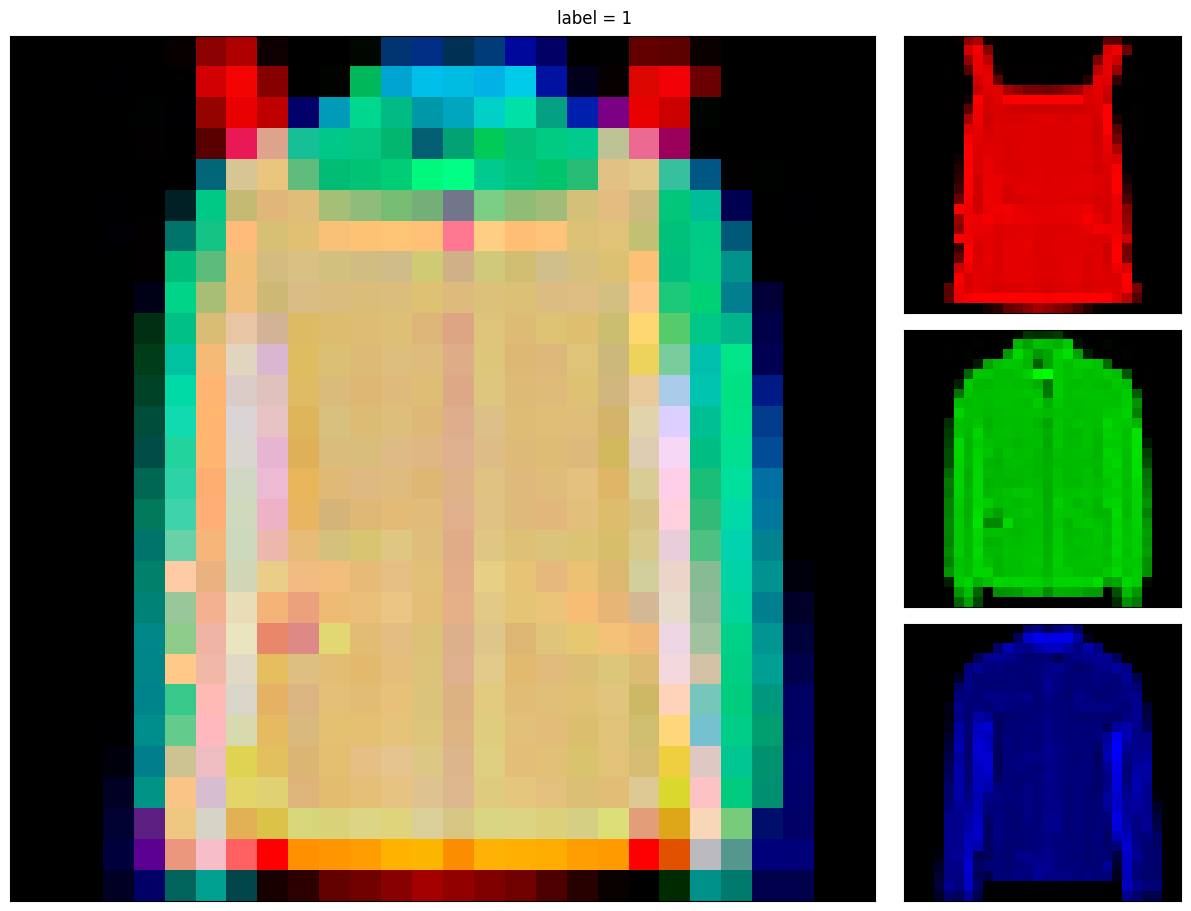
Figure 1: Example image from the FMNISTMash dataset, class label is 1

Your task is to produce TWO models for predicting the class of the image. Note: you can do ONE model which splits the image into its separate colour channels and performs a classification on them separately, but the other MUST work on all three chanels together.

Some hints:
- The code below shows you how to load and view the data.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it. Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

To load the data, we reccomend storing it in your Google Drive, this means you won't need to load it into the local colab storage every time you open the notebook.

The following import will allow your notebook to connect to Google Drive. When you run this cell a seperate window will pop up asking you to grant Drive access to colab. Grant it access to the account which contains FMNISTMash

## Load the data

The dataset is stored as six Numpy files, so to load them we will need to import Numpy. Before loading each file into its own vaiable.

**Note: you'll need to change the location of the file to wherever you stroed your files.**

In [372]:
import numpy as np

train_x = np.load('./train_x.npy', allow_pickle = True)
train_x_2 = np.load('./train_x.npy', allow_pickle = True)
train_y = np.load('./train_y.npy', allow_pickle = True)
valid_x = np.load('./valid_x.npy', allow_pickle = True)
valid_x_2 = np.load('./valid_x.npy', allow_pickle = True)
valid_y = np.load('./valid_y.npy', allow_pickle = True)
test_x = np.load('./test_x.npy', allow_pickle = True)
test_x_2 = np.load('./test_x.npy', allow_pickle = True)
test_y = np.load('./test_y.npy', allow_pickle = True)

## Check the shape of the data
Make sure the data is loaded and in the shape that you expect, FMNISTMash has 50,000 training images, 10,000 validation images, and 10,000 testing images.

In [373]:
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_x shape: {valid_x.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (50000, 3, 28, 28)
train_y shape: (50000,)
valid_x shape: (10000, 3, 28, 28)
valid_y shape: (10000,)
test_x shape: (10000, 3, 28, 28)
test_y shape: (10000,)


## Displaying the Images

### Displaying the single image

To display the images we are going to be using MatPlotLib, so we need to import that, standard practice is to import it as plt

In [104]:
import matplotlib.pyplot as plt

The following two functions aren't necessary, they simply remove the axis ticks and numbers from the rendered image and perform some normalisation to the image.

In [310]:
def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

In [105]:
def image_normalisation(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

We construct the figure using plt, pyplot expects the colour channel to be last, the data is saved in a channels_first format so needs to be converted which is what we used np.move_axis for.

In [276]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

## Pick a random example and plot it

We want to plot a random image, so we import random and pick a random index using the number of images in train_x as a limit.

In [ ]:
import random

ri = random.randrange(train_x.shape[0])

We now render the image, the label indicates how many different FMNIST classes appear in the image.

- 0 = All images are the same class
- 1 = Two images share the same class
- 2 = All images are from different classes

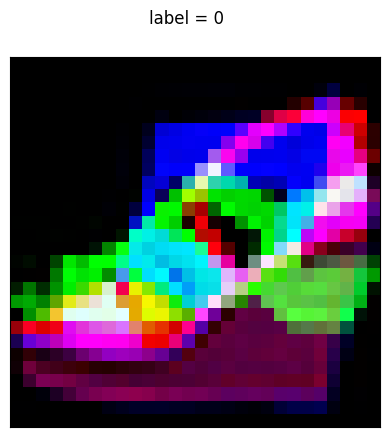

In [ ]:
display_image(train_x[ri], train_y[ri])

## Splitting the Image

This next section is just to make the dataset easier to understand. We will display the image, and then the three images that make it up seperately.

In [277]:
def show_mnist_examples(x, y):
  fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
  gs = fig.add_gridspec(3,4)
  main_ax = fig.add_subplot(gs[:3,:3])
  fig.suptitle('label = '+ str(y))
  main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
  disable_ax_ticks(main_ax)

  for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalisation(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
  plt.show()

Hopefully, you will see the same image rendered early along with the images in the respective colour channels, and you should be able to see which ones share a class from FMNIST and which ones differ. Careful though, as some classes are similar to others.

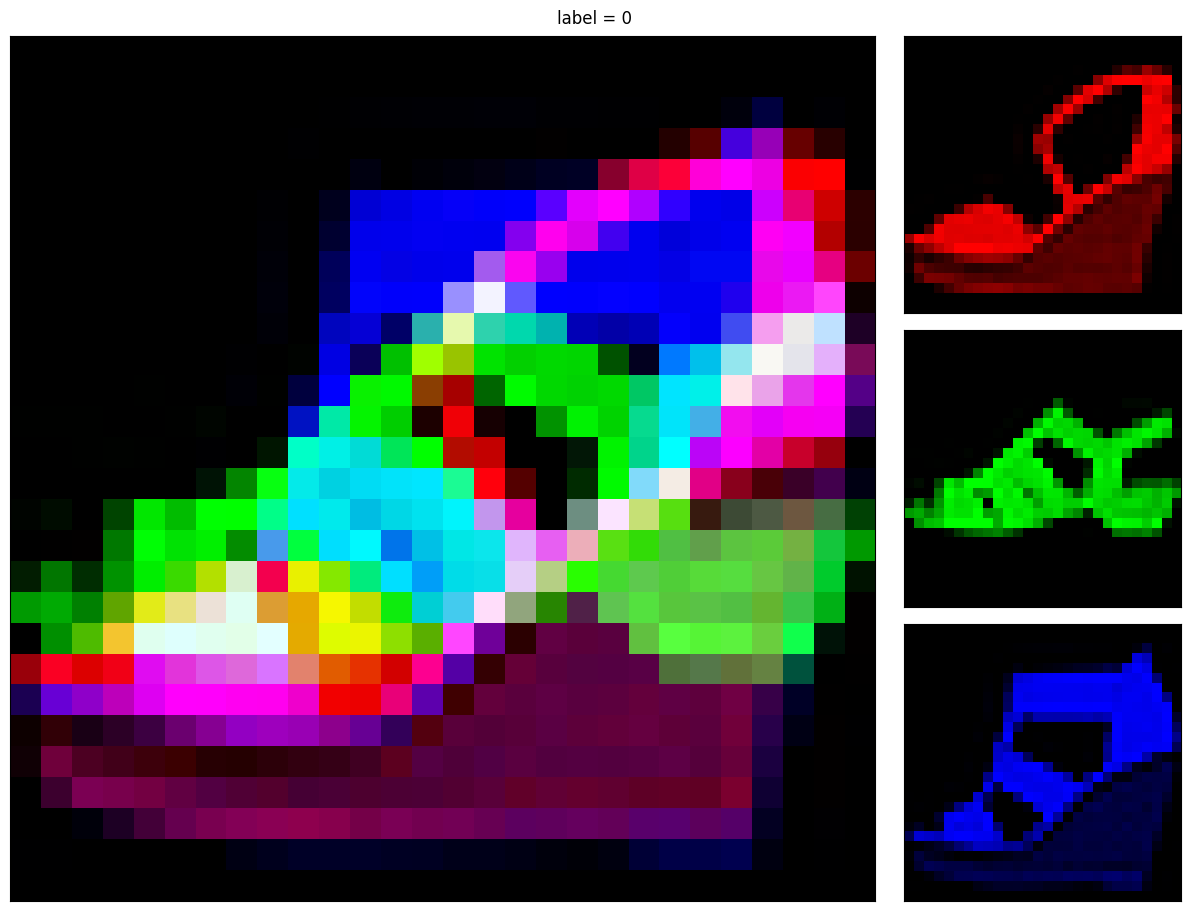

In [ ]:
show_mnist_examples(train_x[ri], train_y[ri])

## Your answer below

In [6]:
# Uncomment this line to install these packages
#!pip install tensorflow 
#!pip install -q -U keras-tuner

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency inf

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 4.4 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━

### Libraries 

We are going to load the libraries for this second project, which mainly includes the use of Keras and TensorFlow. 

In [102]:
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
import keras_tuner as kt

# Exploratory Data Analysis

Many steps of the Exploratory Data Analysis of the images dataset have been provided, such as checking the dataset shape, size of the images and number of samples for all the partitions. Also, the display of sample images has been provided to understand the image content and how it matches with the labels for this image classification problem. 

Nevertheless, we will add some steps to complete the Exploratory Data Analysis of the dataset. We will check the class distribution for all the partitions (training, validation and test). In the figures below, there is no class imbalance in any set because each class has the same number of samples. 

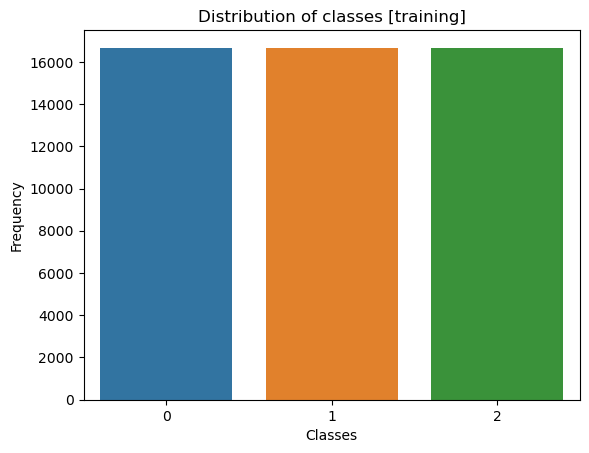

In [412]:
sns.countplot(x=train_y)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of classes [training]')
plt.show()

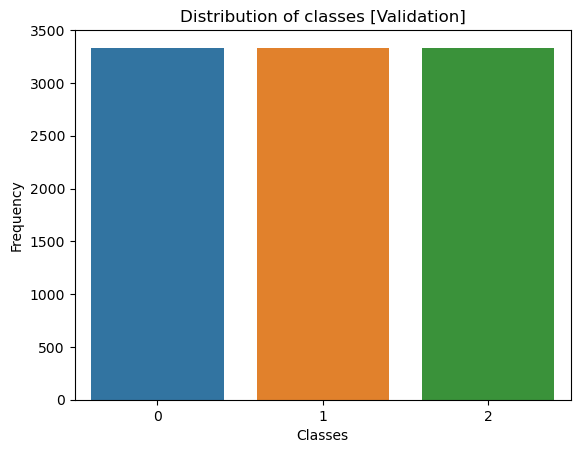

In [413]:
sns.countplot(x=valid_y)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of classes [Validation]')
plt.show()

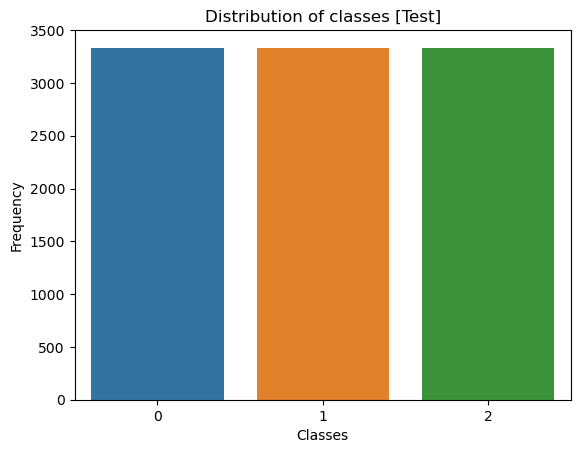

In [414]:
sns.countplot(x=test_y)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of classes [Test]')
plt.show()

Moreover, we will create the RGB histogram of the training set to check the distribution of pixel intensities in each channel. In the figure below, the intensity is skewed to the left, indicating some outliers in the images.

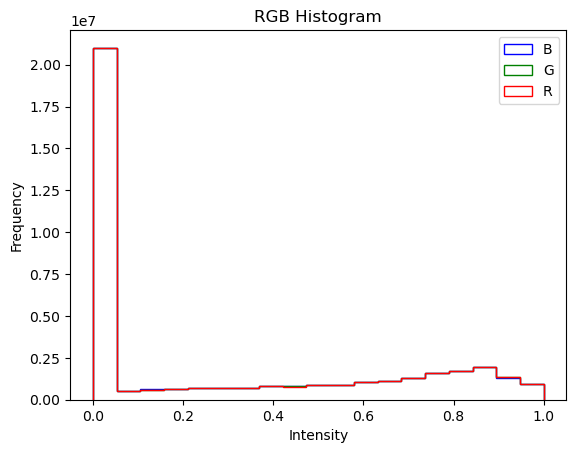

In [422]:
r = train_x_2[:, 0, :, :].flatten()
g = train_x_2[:, 1, :, :].flatten()
b = train_x_2[:, 2, :, :].flatten()
bins = np.linspace(0, 1, 20)
plt.hist([r, g, b], bins, label=['R', 'G', 'B'], color=['r', 'g', 'b'], histtype='step')
plt.legend(loc='upper right')
plt.title("RGB Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

We will ensure that our data is in the correct shape as expected by the Convolutional Neural Network model. Therefore, we will reshape our data. 

In [106]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 3)
valid_x = valid_x.reshape(valid_x.shape[0], 28, 28, 3)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 3)

In this way, the new shape of our training dataset is:

In [ ]:
train_x.shape

(50000, 28, 28, 3)

For the response variable, we will perform OneHotEncoding to convert the class vectors to binary class matrices. 

In [387]:
train_y = keras.utils.to_categorical(train_y, 3)
valid_y = keras.utils.to_categorical(valid_y, 3)
test_y = keras.utils.to_categorical(test_y, 3)

In this way, the new shape of our response variable for the training data is:

In [423]:
train_y.shape

(50000, 3)

Now, we will normalise our images. 

In [108]:
train_x = image_normalisation(train_x)
valid_x = image_normalisation(valid_x)
test_x = image_normalisation(test_x)

# Model 1: The three channels together

To solve this image classification problem, we are going to implement Convolutional Neural Networks. A Convolutional Neural Network (CNN) recognises patterns in the data by making use of convolutional layers. These layers contain some kernels, which extract features from the images to distinguish them from one another. 

In this sense, we are going to define a baseline model using CNN. The baseline model consists in:

1. Three convolutional layers with 32, 64 and 128 filters, respectively, a kernel of 3x3, and 'relu' as the activation function. The size of the kernel is mainly selected for the shape of our images (28x28). 
2. Three pooling layers with a kernel of 2x2 to reduce the spatial extent of the network. 
3. One flatten layer to convert the three-dimensional layer in the network into a one-dimensional vector. 
4. One dense layer with 256 neurons and 'relu' as activation function. 
5. Final dense layer with three neurons, which are the three classes we would like to predict, and 'softmax' as the activation function because it is a multi-class classification problem with more than two classes involved. 

Also, we will use the Adam optimizer with the default learning rate (0.001). 

In [109]:
def define_model(num_rows, num_cols, channels, num_classes):
    model = keras.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model

In [110]:
baseline_model = define_model(28, 28, 3, 3)
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

For this first training, we will use a batch size of 128 and 5 epochs. 

In [111]:
batch_size = 128
epochs = 5

In [112]:
history = baseline_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_data= (valid_x, valid_y))

Epoch 1/5
391/391 [==============================] - 6s 15ms/step - loss: 0.8479 - accuracy: 0.5684 - val_loss: 0.7429 - val_accuracy: 0.6414
Epoch 2/5
391/391 [==============================] - 6s 15ms/step - loss: 0.6990 - accuracy: 0.6600 - val_loss: 0.6590 - val_accuracy: 0.6859
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 0.6397 - accuracy: 0.6976 - val_loss: 0.6488 - val_accuracy: 0.6962
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 0.5981 - accuracy: 0.7186 - val_loss: 0.6037 - val_accuracy: 0.7203
Epoch 5/5
391/391 [==============================] - 6s 15ms/step - loss: 0.5652 - accuracy: 0.7378 - val_loss: 0.5927 - val_accuracy: 0.7305


In [113]:
#code: https://www.tensorflow.org/tutorials/images/classification#visualize_training_results
def summarise_history(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

For this first configuration of batch size and number of epochs, we can see that the number of epochs might be slightly low because it seems that the model can still learn more and improve the accuracy. Also, we can see that the training and validation loss are both decreasing, therefore, we can try a larger number of epochs. 

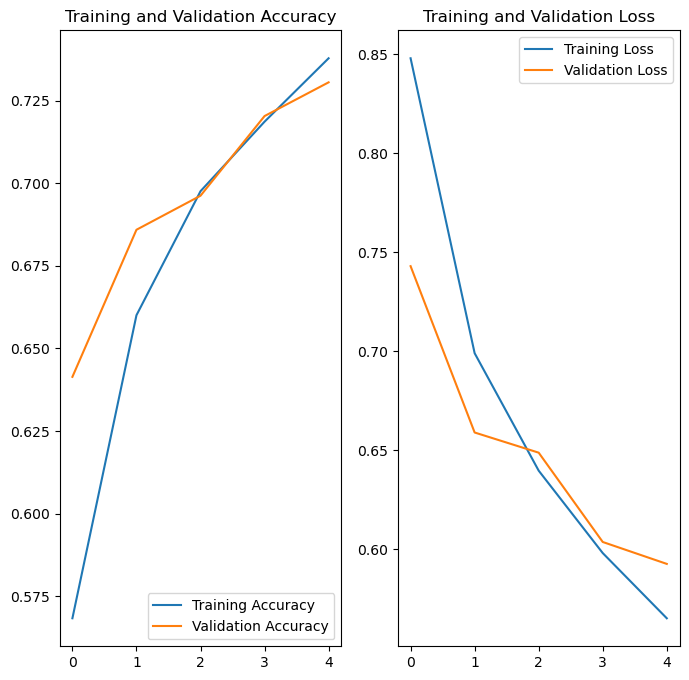

In [114]:
summarise_history(history,epochs)

In this way, we will try 15 as number of epochs with the same batch size (128). 

In [118]:
model = define_model(28, 28, 3, 3)
epochs = 15
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_data= (valid_x, valid_y))

Epoch 1/15
391/391 [==============================] - 6s 16ms/step - loss: 0.8315 - accuracy: 0.5781 - val_loss: 0.7738 - val_accuracy: 0.6152
Epoch 2/15
391/391 [==============================] - 6s 15ms/step - loss: 0.6997 - accuracy: 0.6603 - val_loss: 0.6829 - val_accuracy: 0.6815
Epoch 3/15
391/391 [==============================] - 6s 15ms/step - loss: 0.6488 - accuracy: 0.6911 - val_loss: 0.6847 - val_accuracy: 0.6664
Epoch 4/15
391/391 [==============================] - 6s 15ms/step - loss: 0.6075 - accuracy: 0.7119 - val_loss: 0.6191 - val_accuracy: 0.7122
Epoch 5/15
391/391 [==============================] - 6s 15ms/step - loss: 0.5715 - accuracy: 0.7319 - val_loss: 0.6053 - val_accuracy: 0.7147
Epoch 6/15
391/391 [==============================] - 6s 15ms/step - loss: 0.5407 - accuracy: 0.7485 - val_loss: 0.6134 - val_accuracy: 0.7086
Epoch 7/15
391/391 [==============================] - 6s 15ms/step - loss: 0.5172 - accuracy: 0.7618 - val_loss: 0.5852 - val_accuracy: 0.7288

In this case, with 15 epochs, the training accuracy improved, but the validation accuracy did not get better from 0.75. Also, we can see that around the 10th epoch, the training loss keeps decreasing, but the validation loss starts increasing, meaning that a sign of overfitting occurs after this epoch. 

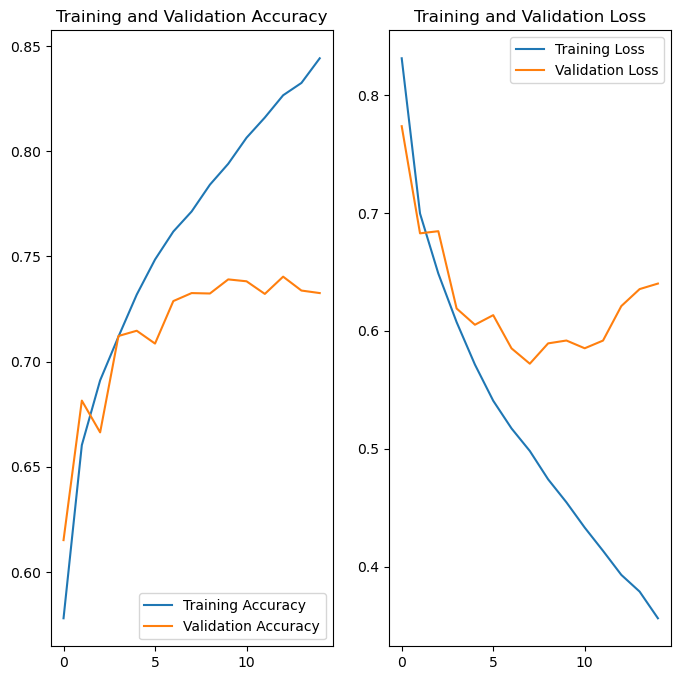

In [119]:
summarise_history(history,epochs)

Now, we can try to decrease the batch size to 64 and the number of epochs to 10. However, the accuracy does not go further than 0.75 for the validation loss. Moreover, a sign of overfitting also occurs around the 7th epoch when the validation loss starts increasing, and there is a significant gap between the validation and training loss. 

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 0.8040 - accuracy: 0.5967 - val_loss: 0.7510 - val_accuracy: 0.6364
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.6740 - accuracy: 0.6795 - val_loss: 0.6381 - val_accuracy: 0.7022
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6135 - accuracy: 0.7118 - val_loss: 0.6020 - val_accuracy: 0.7208
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.5720 - accuracy: 0.7325 - val_loss: 0.5880 - val_accuracy: 0.7257
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5393 - accuracy: 0.7500 - val_loss: 0.5818 - val_accuracy: 0.7310
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5128 - accuracy: 0.7651 - val_loss: 0.5712 - val_accuracy: 0.7357
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4881 - accuracy: 0.7778 - val_loss: 0.5627 - val_accuracy: 0.7434
Epoch 

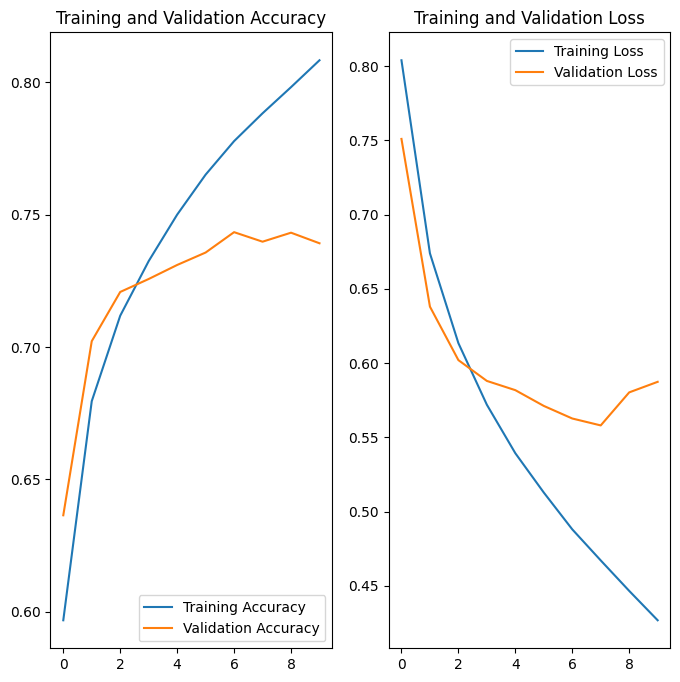

In [ ]:
batch_size = 64
epochs = 10
model = define_model(28, 28, 3, 3)
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_data= (valid_x, valid_y))
summarise_history(history,epochs)

By just changing those two parameters (batch size and epochs), the model's output is affected, and the configurations did not improve the validation accuracy of the model. In this sense, we will try to add more complexity to the model by duplicating the number of convolutional layers and increasing the number of filters in these layers (64, 128 and 256) for every two of them, respectively. Also, we will add one dense layer and the number of filters will be raised to 512 neurons.  

In [ ]:
def complex_model_1(num_rows, num_cols, channels, num_classes):
    model = keras.Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_cols, channels)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
   
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = complex_model_1(28, 28, 3, 3)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 64)        1792      
                                                                 
 conv2d_51 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 conv2d_53 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                               

For this complex model, we will try a batch size of 128 and 5 epochs. In the following figure, we can see that we added a lot of complexity to the network, thus, the accuracy is very low and the validation loss is always lower than the training loss.

Epoch 1/5
391/391 [==============================] - 14s 28ms/step - loss: 1.0989 - accuracy: 0.3353 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/5
391/391 [==============================] - 9s 23ms/step - loss: 1.0986 - accuracy: 0.3344 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/5
391/391 [==============================] - 9s 23ms/step - loss: 1.0987 - accuracy: 0.3314 - val_loss: 1.0986 - val_accuracy: 0.3334
Epoch 4/5
391/391 [==============================] - 9s 23ms/step - loss: 1.0986 - accuracy: 0.3319 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/5
391/391 [==============================] - 9s 22ms/step - loss: 1.0986 - accuracy: 0.3346 - val_loss: 1.0986 - val_accuracy: 0.3333


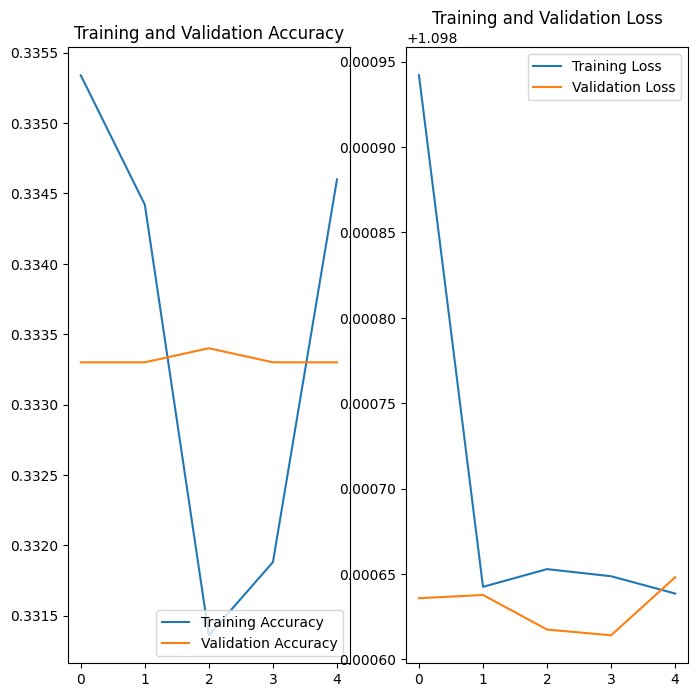

In [ ]:
batch_size = 128
epochs = 5
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_data= (valid_x, valid_y))
summarise_history(history,epochs)

All these tests are a way to demonstrate all the hyperparameters and parameters that we can change in a CNN to learn the features of our images. We could think about performing a GridSearchCV as we did in the tabular project to tune the hyperparameters of the network. This can be done by defining a grid with *n* dimensions representing the number of hyperparameters and parameters (such as learning rate, batch size, activation functions, number of filters and neurons) and for each dimension, a range of possible values. However, by increasing the number of dimensions and the number of possible values, the time complexity is outrageous in a complex model such as a CNN. 

To perform the hyperparameter tuning and find the best set of parameters, we will use the Keras Tuner. For this search, we will create a model builder and we will define the components of our network we want to test. 

We will stick with the structure of the baseline model, that is three convolutional layers, three pooling layers, one flatten layer and two dense layers. We will add a dropout layer to avoid overfitting, and we will use the same optimiser. Now, we will search for the best:

1. Activation function for the convolutional layers and one of the dense layers between 'relu' and 'tanh'
2. Learning rate for the Adam optimiser
3. Number of filters for each convolutional layer in a range of [32, 512] with steps of 32 filters
4. Number of neurons for the dense layer in a range of [32, 512] with steps of 32 neurons

In [121]:
def model_builder(hp):
  model = keras.Sequential()

  hp_activation = hp.Choice('activation', values = ['relu', 'tanh'])
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  hp_conv_1 = hp.Int('conv_1', min_value = 32, max_value = 512, step = 32)
  hp_conv_2 = hp.Int('conv_2', min_value = 32, max_value = 512, step = 32)
  hp_conv_3 = hp.Int('conv_3', min_value = 32, max_value = 512, step = 32)
  hp_dense = hp.Int('dense', min_value = 32, max_value = 512, step = 32)

  model.add(Conv2D(filters=hp_conv_1, kernel_size=(3, 3), padding="same", activation=hp_activation, input_shape=(28, 28, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=hp_conv_2, kernel_size=(3, 3), padding="same", activation=hp_activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=hp_conv_3, kernel_size=(3, 3), padding="same", activation=hp_activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(units=hp_dense, activation=hp_activation))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  
  adam_optimizer = Adam(learning_rate=hp_learning_rate)
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam_optimizer, metrics=['accuracy'])

  return model

We will use the Hyperband tuner for the Keras Tuner with 30 trials. 

In [122]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='ml_images')

Reloading Tuner from dir/ml_images/tuner0.json


We will add an Early Stopping callback when fitting the model. This will ensure to stop the training when a validation loss has stopped improving. This means that we will avoid a chance of overfitting. 

In [123]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

This process of tuning the hyperparameter took 4h 39m to complete with 30 trials. The best accuracy so far was 0.83. 

In [124]:
tuner.search(train_x, train_y, epochs=50, validation_data= (valid_x, valid_y), callbacks=[stop_early])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

The hyperparameter search is complete. The best set of hyperparameters for the Convolutional Neural Network is mentioned below. We can see that the number of filters for all the convolutional layers and the number of neurons for the dense layer are high. The learning rate of the Adam optimiser is still the default one and the best activation function is relu.

In [130]:
print(f"""The hyperparameter search is complete.
The optimal number of filters for the first convolutional layer is {best_hps.get('conv_1')}.
The optimal number of filters for the second convolutional layer is {best_hps.get('conv_2')}.
The optimal number of filters for the third convolutional layer is {best_hps.get('conv_3')}.
The optimal number of units for the dense layer is {best_hps.get('dense')}.
The optimal learning rate for the Adam optimiser is {best_hps.get('learning_rate')}
The optimal activation function is {best_hps.get('activation')}""")

The hyperparameter search is complete.
The optimal number of filters for the first convolutional layer is 416.
The optimal number of filters for the second convolutional layer is 224.
The optimal number of filters for the third convolutional layer is 96.
The optimal number of units for the dense layer is 320.
The optimal learning rate for the Adam optimiser is 0.001
The optimal activation function is relu


It is a great advantage to have this kind of tool to perform an automated search of the hyperparameters for a network, because, by random guessing, would be extremely hard to think about the combination given by the Keras Tuner. 

Now, we will build the model with the best hyperparameters and train them for 50 epochs to later select the best number of epochs. 

In [126]:
model_tuner = tuner.hypermodel.build(best_hps)
history_tuner = model_tuner.fit(train_x, train_y, epochs=50, validation_data= (valid_x, valid_y))

Epoch 1/50
1563/1563 [==============================] - 173s 110ms/step - loss: 0.7485 - accuracy: 0.6271 - val_loss: 0.5747 - val_accuracy: 0.7339
Epoch 2/50
1563/1563 [==============================] - 174s 112ms/step - loss: 0.5459 - accuracy: 0.7497 - val_loss: 0.4939 - val_accuracy: 0.7740
Epoch 3/50
1563/1563 [==============================] - 178s 114ms/step - loss: 0.4787 - accuracy: 0.7837 - val_loss: 0.4650 - val_accuracy: 0.7878
Epoch 4/50
1563/1563 [==============================] - 178s 114ms/step - loss: 0.4308 - accuracy: 0.8091 - val_loss: 0.4256 - val_accuracy: 0.8122
Epoch 5/50
1563/1563 [==============================] - 177s 113ms/step - loss: 0.3984 - accuracy: 0.8266 - val_loss: 0.4231 - val_accuracy: 0.8162
Epoch 6/50
1563/1563 [==============================] - 177s 113ms/step - loss: 0.3720 - accuracy: 0.8393 - val_loss: 0.4004 - val_accuracy: 0.8317
Epoch 7/50
1563/1563 [==============================] - 177s 113ms/step - loss: 0.3506 - accuracy: 0.8497 - val_

The best number of epochs for our model is 11. We can see that after this epoch the validation loss starts increasing and creating a bigger gap with the training loss indicating a sign of overfitting. Therefore, we will proceed and retrain the model with this optimal number of epochs.

In [150]:
val_acc_per_epoch = history_tuner.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 11


In the following output, we can see that the training and validation loss are both decreasing and the accuracy reached a higher value compared to the initial tests.

In [151]:
hypermodel = tuner.hypermodel.build(best_hps)

hypermodel.fit(train_x, train_y, epochs=best_epoch, validation_data=(valid_x, valid_y))

Epoch 1/11
1563/1563 [==============================] - 180s 115ms/step - loss: 0.7441 - accuracy: 0.6301 - val_loss: 0.5910 - val_accuracy: 0.7275
Epoch 2/11
1563/1563 [==============================] - 177s 113ms/step - loss: 0.5445 - accuracy: 0.7498 - val_loss: 0.4945 - val_accuracy: 0.7836
Epoch 3/11
1563/1563 [==============================] - 177s 113ms/step - loss: 0.4784 - accuracy: 0.7852 - val_loss: 0.4709 - val_accuracy: 0.7942
Epoch 4/11
1563/1563 [==============================] - 177s 113ms/step - loss: 0.4358 - accuracy: 0.8082 - val_loss: 0.4409 - val_accuracy: 0.8079
Epoch 5/11
1563/1563 [==============================] - 179s 115ms/step - loss: 0.4026 - accuracy: 0.8231 - val_loss: 0.4168 - val_accuracy: 0.8190
Epoch 6/11
1563/1563 [==============================] - 176s 113ms/step - loss: 0.3708 - accuracy: 0.8392 - val_loss: 0.4378 - val_accuracy: 0.8126
Epoch 7/11
1563/1563 [==============================] - 176s 113ms/step - loss: 0.3460 - accuracy: 0.8517 - val_

After training our data and performing the hyperparameter tuning to select the best parameters, we can evaluate our model in unseen data in our test set. In summary, we reached an accuracy of 0.84 for a model with the three channels together. 

In [129]:
result = hypermodel.evaluate(test_x, test_y)
print("[test loss, test accuracy]:", result)

313/313 [==============================] - 9s 28ms/step - loss: 0.4459 - accuracy: 0.8396
[test loss, test accuracy]: [0.4458601176738739, 0.8396000266075134]


# Model 2: Splitting the colour channels

For this second model, we will split the three colour channels and create a single grayscale image by stacking each channel in a vertical direction. Therefore, the output of the image will be (28*3 = 84, 28).

In [131]:
def split_and_stack_channels(data):
  vertical_arr = []
  for img in data:
    r_channel = img[0, :, :]
    g_channel = img[1, :, :]
    b_channel = img[2, :, :]

    vertical_img = np.vstack((r_channel, g_channel, b_channel))

    vertical_arr.append(vertical_img)

  return np.array(vertical_arr)

The new shape of our dataset is:

In [132]:
split_train_x = split_and_stack_channels(train_x_2)
split_train_x.shape

(50000, 84, 28)

We will select the first image of our dataset to demonstrate the transformation of the images in a stacked vertical position. Therefore, we can see that the new position of the images is as follows:

R - cloth in the red channel

G - cloth in the green channel

B - cloth in the blue channel

In [ ]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(x))
    disable_ax_ticks(main_ax)
    plt.show()

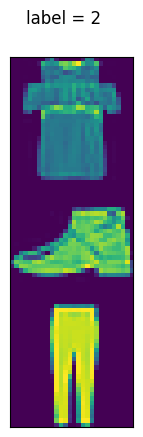

In [ ]:
display_image(split_train_x[0], train_y[0])

We do the same transformation for the validation and test set.

In [383]:
split_valid_x = split_and_stack_channels(valid_x_2)
split_test_x = split_and_stack_channels(test_x_2)

The new shape of our data is as follows:

In [384]:
print(f'split_train_x shape: {split_train_x.shape}')
print(f'split_valid_x shape: {split_valid_x.shape}')
print(f'split_test_x shape: {split_test_x.shape}')

split_train_x shape: (50000, 84, 28)
split_valid_x shape: (10000, 84, 28)
split_test_x shape: (10000, 84, 28)


Now, we will convert the values to float32 to speed the computation and we will normalise the data. 

In [385]:
x_train = split_train_x.astype('float32')
x_valid = split_valid_x.astype('float32')
x_test = split_test_x.astype('float32')

x_train = image_normalisation(x_train)
x_valid = image_normalisation(x_valid)
x_test = image_normalisation(x_test)

Next, we will define the baseline model for this approach. From the previous model with the three channels together, we had some interesting learnings, thus, we will stick with the same architecture. We will have three convolutional layers, three pooling layers, one flatten layer and two dense layers. 

In [134]:
def define_model_split(num_rows, num_cols, num_classes):
    model = keras.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_cols, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model

We will fit our model with a batch size of 128 and 10 epochs. 

In [141]:
batch_size = 128
epochs = 10
model = define_model_split(84, 28, 3)
history = model.fit(x_train, train_y, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_data= (x_valid, valid_y))

Epoch 1/10
391/391 [==============================] - 18s 46ms/step - loss: 0.8094 - accuracy: 0.5928 - val_loss: 0.6774 - val_accuracy: 0.6828
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 0.6157 - accuracy: 0.7066 - val_loss: 0.5583 - val_accuracy: 0.7467
Epoch 3/10
391/391 [==============================] - 18s 46ms/step - loss: 0.5189 - accuracy: 0.7599 - val_loss: 0.5071 - val_accuracy: 0.7654
Epoch 4/10
391/391 [==============================] - 18s 46ms/step - loss: 0.4500 - accuracy: 0.7974 - val_loss: 0.4552 - val_accuracy: 0.7913
Epoch 5/10
391/391 [==============================] - 18s 46ms/step - loss: 0.4089 - accuracy: 0.8190 - val_loss: 0.4328 - val_accuracy: 0.8085
Epoch 6/10
391/391 [==============================] - 18s 47ms/step - loss: 0.3764 - accuracy: 0.8332 - val_loss: 0.4209 - val_accuracy: 0.8138
Epoch 7/10
391/391 [==============================] - 18s 46ms/step - loss: 0.3487 - accuracy: 0.8461 - val_loss: 0.4137 - val_accuracy:

We can immediately notice from the following figure that the accuracy is higher than the baseline model in the previous approach with the three channels together. The validation accuracy is above 0.80, and the training accuracy reaches more than 0.85. In addition, the training and validation loss constantly decreases. However, there is a sign that around the 7th epoch, the validation loss might start to increase indicating overfitting.   

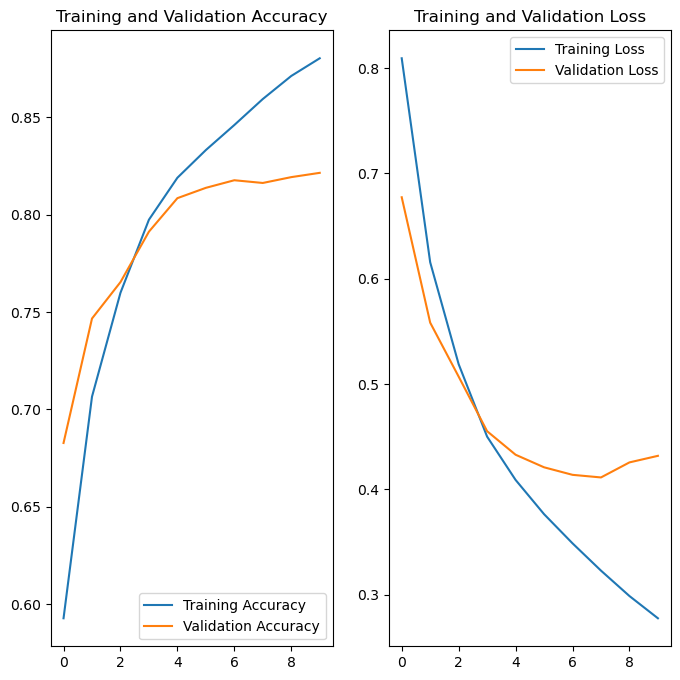

In [142]:
summarise_history(history,epochs)

From the previous model, we explained that we can do some trials and errors by changing the hyperparameters and parameters such as epochs and batch sizes. Also, we can proceed by doing a GridSearchCV or RandomSearchCV for different values. However, we will stick with the last approach by using the automated Keras Tuner to find the best set of parameters.

We will keep the structure of the baseline model. That is three convolutional layers, three pooling layers, one flatten layer and two dense layers. We will add a dropout layer to avoid overffiting, and we will use the Adam optimiser. Now, we will search for the best:

1. Activation function for the convolutional layers and one of the dense layers
2. Learning rate for the Adam optimiser
3. Number of filters for each convolutional layer in a range of [32, 512] with steps of 32 filters
4. Number of neurons for the dense layer in a range of [32, 512] with steps of 32 neurons

In [145]:
def model_builder_2(hp):
  model = keras.Sequential()

  hp_activation = hp.Choice('activation', values = ['relu', 'tanh'])
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  hp_conv_1 = hp.Int('conv_1', min_value = 32, max_value = 512, step = 32)
  hp_conv_2 = hp.Int('conv_2', min_value = 32, max_value = 512, step = 32)
  hp_conv_3 = hp.Int('conv_3', min_value = 32, max_value = 512, step = 32)
  hp_dense = hp.Int('dense', min_value = 32, max_value = 512, step = 32)

  model.add(Conv2D(filters=hp_conv_1, kernel_size=(3, 3), padding="same", activation=hp_activation, input_shape=(84, 28, 1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=hp_conv_2, kernel_size=(3, 3), padding="same", activation=hp_activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=hp_conv_3, kernel_size=(3, 3), padding="same", activation=hp_activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(units=hp_dense, activation=hp_activation))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  
  adam_optimizer = Adam(learning_rate=hp_learning_rate)
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam_optimizer, metrics=['accuracy'])

  return model

We will use the Hyperband tuner for the Keras Tuner. 

In [146]:
tuner_2 = kt.Hyperband(model_builder_2,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=2,
                     directory='dir',
                     project_name='ml_images_2')

Reloading Tuner from dir/ml_images_2/tuner0.json


Now, we can execute the hyperparameter tuning with the Keras Tuner. We will add the EarlyStopping callback to avoid overfitting. 

In [147]:
tuner_2.search(x_train, train_y, epochs=40, validation_data= (x_valid, valid_y), callbacks=[stop_early])

best_hps_2=tuner_2.get_best_hyperparameters(num_trials=1)[0]

Trial 38 Complete [00h 34m 04s]
val_accuracy: 0.7831000089645386

Best val_accuracy So Far: 0.8328999876976013
Total elapsed time: 2d 22h 49m 02s


The hyperparameter search is complete. The best set of hyperparameters for the Convolutional Neural Network is mentioned below. Comparing the results of the model with the three channels together, we can highlight that this model does not need as many filters in the convolutional layers as the first one. For instance, the first convolutional layer just needs 224 filters compared to 416 from the first model. Also, the dense layer just has 192 neurons compared to 320 neurons in the first model.

In [328]:
print(f"""The hyperparameter search is complete.
The optimal number of filters for the first convolutional layer is {best_hps_2.get('conv_1')}.
The optimal number of filters for the second convolutional layer is {best_hps_2.get('conv_2')}.
The optimal number of filters for the third convolutional layer is {best_hps_2.get('conv_3')}.
The optimal number of units for the dense layer is {best_hps_2.get('dense')}.
The optimal learning rate for the Adam optimiser is {best_hps_2.get('learning_rate')}
The optimal activation function is {best_hps_2.get('activation')}""")

The hyperparameter search is complete.
The optimal number of filters for the first convolutional layer is 224.
The optimal number of filters for the second convolutional layer is 256.
The optimal number of filters for the third convolutional layer is 256.
The optimal number of units for the dense layer is 192.
The optimal learning rate for the Adam optimiser is 0.001
The optimal activation function is relu


Now, we will build the model with the best hyperparameters and we will train them for 50 epochs to later select the best number of epochs.

***Note***: the next block shows an error because I was selecting the *val_acc_per_epoch* from the previous tuning. I did not run again because it takes so much time.

In [149]:
model_tuner_2 = tuner_2.hypermodel.build(best_hps_2)
history_tuner_2 = model_tuner_2.fit(x_train, train_y, epochs=50, validation_data= (x_valid, valid_y))

Epoch 1/50
1563/1563 [==============================] - 321s 205ms/step - loss: 0.8001 - accuracy: 0.5965 - val_loss: 0.6622 - val_accuracy: 0.6902
Epoch 2/50
1563/1563 [==============================] - 578s 370ms/step - loss: 0.6367 - accuracy: 0.6985 - val_loss: 0.5551 - val_accuracy: 0.7419
Epoch 3/50
1563/1563 [==============================] - 317s 203ms/step - loss: 0.5757 - accuracy: 0.7322 - val_loss: 0.4901 - val_accuracy: 0.7833
Epoch 4/50
1563/1563 [==============================] - 318s 203ms/step - loss: 0.5286 - accuracy: 0.7564 - val_loss: 0.4547 - val_accuracy: 0.8018
Epoch 5/50
1563/1563 [==============================] - 315s 202ms/step - loss: 0.4892 - accuracy: 0.7802 - val_loss: 0.4301 - val_accuracy: 0.8094
Epoch 6/50
1563/1563 [==============================] - 317s 203ms/step - loss: 0.4579 - accuracy: 0.7940 - val_loss: 0.4205 - val_accuracy: 0.8143
Epoch 7/50
1563/1563 [==============================] - 321s 205ms/step - loss: 0.4348 - accuracy: 0.8066 - val_

ValueError: 0.8215000033378601 is not in list

The best number of epochs for our model is 20 which is larger than the model with the three channels together, meaning, that this model requires more number of times to pass trough the entire data set. We can see that after this epoch the validation loss starts increasing and creating a bigger gap with the training loss indicating a sign of overfitting. Therefore, we will proceed and retrain the model with this optimal number of epochs.

In [152]:
val_acc_per_epoch_2 = history_tuner_2.history['val_accuracy']
best_epoch_2 = val_acc_per_epoch_2.index(max(val_acc_per_epoch_2)) + 1
print('Best epoch: %d' % (best_epoch_2,))

Best epoch: 20


In the following output, we can see that the training and validation loss are both decreasing and the accuracy reached a higher value compared to the first model.

In [154]:
hypermodel_2 = tuner_2.hypermodel.build(best_hps)

hypermodel_2.fit(x_train, train_y, epochs=best_epoch_2, validation_data=(x_valid, valid_y))

Epoch 1/20
1563/1563 [==============================] - 455s 291ms/step - loss: 0.7769 - accuracy: 0.6099 - val_loss: 0.6208 - val_accuracy: 0.7115
Epoch 2/20
1563/1563 [==============================] - 449s 288ms/step - loss: 0.5925 - accuracy: 0.7238 - val_loss: 0.5221 - val_accuracy: 0.7649
Epoch 3/20
1563/1563 [==============================] - 448s 287ms/step - loss: 0.5144 - accuracy: 0.7646 - val_loss: 0.4530 - val_accuracy: 0.7959
Epoch 4/20
1563/1563 [==============================] - 447s 286ms/step - loss: 0.4572 - accuracy: 0.7925 - val_loss: 0.4136 - val_accuracy: 0.8132
Epoch 5/20
1563/1563 [==============================] - 453s 290ms/step - loss: 0.4266 - accuracy: 0.8095 - val_loss: 0.3981 - val_accuracy: 0.8231
Epoch 6/20
1563/1563 [==============================] - 447s 286ms/step - loss: 0.3968 - accuracy: 0.8247 - val_loss: 0.3820 - val_accuracy: 0.8309
Epoch 7/20
1563/1563 [==============================] - 459s 294ms/step - loss: 0.3773 - accuracy: 0.8342 - val_

Now that we already trained our data, we can now evaluate our model in unseen data, that is our test set. In summary, we reached an accuracy of 0.84 for a model with grayscale images in stacked vertical position. 

In [155]:
result_2 = hypermodel_2.evaluate(x_test, test_y)
print("[test loss, test accuracy]:", result_2)

313/313 [==============================] - 26s 82ms/step - loss: 0.4132 - accuracy: 0.8410
[test loss, test accuracy]: [0.4131970703601837, 0.8410000205039978]


## Making the dataset bigger by doing all the combinations of the channels

We will try some manual data augmentation for this second model. We mentioned that we stacked each channel in vertical position by having the R channel in the top, the G channel in the middle and the B channel in the bottom. However, we are going to create the six combinations of the three channels in the training data. This means we will make our dataset six times bigger. 

In [375]:
def split_and_augment_channels(data, labels):
  vertical_arr = []
  for img in data:
    r_channel = img[0, :, :]
    g_channel = img[1, :, :]
    b_channel = img[2, :, :]

    order_1 = np.vstack((r_channel, g_channel, b_channel))
    order_2 = np.vstack((r_channel, b_channel, g_channel))
    order_3 = np.vstack((b_channel, r_channel, g_channel))
    order_4 = np.vstack((g_channel, r_channel, b_channel))
    order_5 = np.vstack((g_channel, b_channel, r_channel))
    order_6 = np.vstack((b_channel, g_channel, r_channel))

    vertical_arr.extend((order_1, order_2, order_3, order_4, order_5, order_6))

  aug_arr = np.repeat(labels, 6)

  return np.array(vertical_arr), aug_arr

In [376]:
aug_train_x, aug_train_y = split_and_augment_channels(train_x_2, train_y)

As mentioned above, we are making our dataset six times bigger by having 300000 sample images stacked in vertical position with the shape of 84x28

In [377]:
print(f'aug_train_x shape: {aug_train_x.shape}')
print(f'aug_train_y shape: {aug_train_y.shape}')

aug_train_x shape: (300000, 84, 28)
aug_train_y shape: (300000,)


Now, we will convert the values to float32 to speed the computation and we will normalise the data. 

In [378]:
x_train_aug = aug_train_x.astype('float32')

x_train_aug = image_normalisation(x_train_aug)

Also, we updated our training labels by repeating the label six times. Therefore, we also have to do OneHotEncoding. 

In [388]:
aug_train_y = keras.utils.to_categorical(aug_train_y, 3)

For this case, we will build the same model with the hyperparameters that the Keras Tuner suggested in previous steps. 

In [379]:
def define_model_aug(num_rows, num_cols, num_classes):
    model = keras.Sequential()
    model.add(Conv2D(224, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_cols, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(192, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model

Now, we are going to fit our model with a batch size of 128 and 20 epochs. Also, we will use the EarlyStopping callback to avoid overfitting. 

In [389]:
batch_size = 128
epochs = 20
model_aug = define_model_aug(84, 28, 3)
history_aug = model_aug.fit(x_train_aug, aug_train_y, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_data= (x_valid, valid_y),
              callbacks=[stop_early])

Epoch 1/20
2344/2344 [==============================] - 2947s 1s/step - loss: 0.4977 - accuracy: 0.7668 - val_loss: 0.3686 - val_accuracy: 0.8344
Epoch 2/20
2344/2344 [==============================] - 4118s 2s/step - loss: 0.3004 - accuracy: 0.8682 - val_loss: 0.3135 - val_accuracy: 0.8626
Epoch 3/20
2344/2344 [==============================] - 3738s 2s/step - loss: 0.2193 - accuracy: 0.9074 - val_loss: 0.3071 - val_accuracy: 0.8798
Epoch 4/20
2344/2344 [==============================] - 9733s 4s/step - loss: 0.1543 - accuracy: 0.9367 - val_loss: 0.3226 - val_accuracy: 0.8859
Epoch 5/20
2344/2344 [==============================] - 7210s 3s/step - loss: 0.1064 - accuracy: 0.9578 - val_loss: 0.3780 - val_accuracy: 0.8838
Epoch 6/20
2344/2344 [==============================] - 5152s 2s/step - loss: 0.0737 - accuracy: 0.9716 - val_loss: 0.4154 - val_accuracy: 0.8897


From the figure below, we can see that the training and validation accuracy improved, and the number of epochs was drastically reduced to 6 epochs. However, the validation loss rapidly increases from the second epoch indicating that these transformation in the data increases the chances of overfitting because the model can't generalise very well to unseen data. 

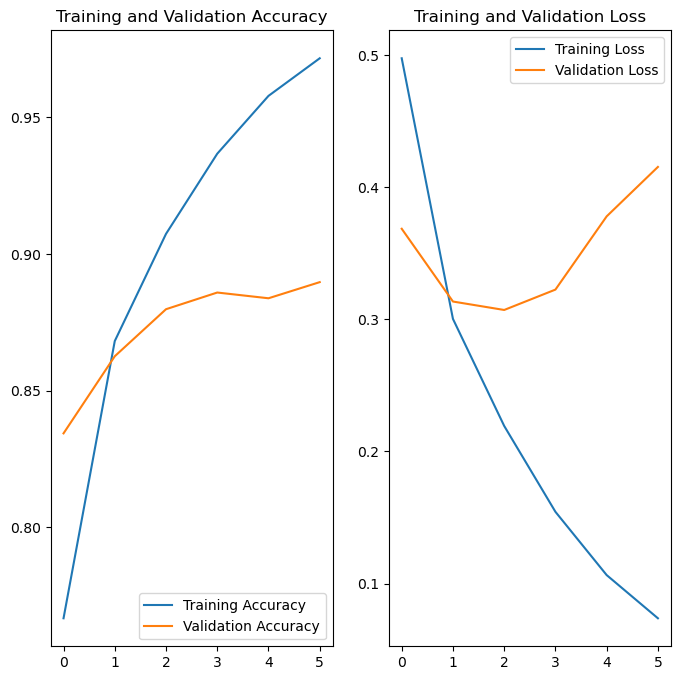

In [391]:
summarise_history(history_aug,6)

Finally, we will evaluate the model in the test set. We get an accuracy of 0.88 which is slightly better than the model with the three channels together and the model with the stacked channels in vertical position without the manual augmentation of the data.

In [395]:
score = model_aug.evaluate(x_test, test_y, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Summary: Loss over the test dataset: 0.31, Accuracy: 0.88


# Conclusion

In summary, the best way to approach this image classification problem was using Convolutional Neural Network because it extracts the features from the images and can distinguish from one to another to make an accurate classification. Moreover, we discovered that the accuracy for both models is almost the same with a value of 0.84. However, the second model needed fewer filters in the convolutional layers and fewer neurons in the dense layers, due to the image being in grayscale and less complex to extract the features than images with the RGB channel. In addition, by doing extra preprocessing steps, such as data augmentation by making our dataset larger with the different vertical positioning of the three channels, we achieved a higher accuracy of 0.88. Therefore, for future work, we can try to do the same for each RGB channel and merge the augmentations of each channel to improve the accuracy in the first model. Finally, the Keras Tuner facilitates the hyperparameter tuning process of neural networks.

# References

Wang, Z., Turko, R., Shaikh, O., Park, H., Das, N., Hohman, F., Kahng, M., Horng Chau, D. (2020). *CNN Explainer: Learning Convolutional Neural Networks with Interactive Visualization* https://poloclub.github.io/cnn-explainer/

Nabi, J. (Mar 16, 2019). *Hyper-parameter Tuning Techniques in Deep Learning*. Towards Data Science. https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8

Smith, L. (2018). *A Disciplined Approach To Neural Network Hyper-parameters: Part 1 - Learning Rate, Batch Size, Momentum, and Weight Decay*. US Naval Research Laboratory. Washington, DC, USA. 

Greg Hogg. (August 3, 2022). *Automatic Neural Network Hyperparameter Tuning for TensorFlow Models using Keras Tuner in Python*. YouTube. https://www.youtube.com/watch?v=6Nf1x7qThR8

*Image classification*. TensorFlow. https://www.tensorflow.org/tutorials/images/classification

*Overfit and underfit*. TensorFlow. https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

*Introduction to the Keras Tuner*. Keras Developer Guides. https://www.tensorflow.org/tutorials/keras/keras_tuner

O'Malley, T., Jin, H. (2019). *Tune hyperparameters in your custom training loop* Keras Developer Guides. https://keras.io/guides/keras_tuner/custom_tuner/

Rosebrock, A. (June 7, 2021). *Easy Hyperparameter Tuning with Keras Tuner and TensorFlow*. PyImageSearch. https://pyimagesearch.com/2021/06/07/easy-hyperparameter-tuning-with-keras-tuner-and-tensorflow/

Rosebrock, A. (June 7, 2021). *Keras Conv2D and Convolutional Layers*. PyImageSearch. https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/